## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256,256, 128,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.75

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               

Epoch 47/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.7463 - accuracy: 0.7308 - val_loss: 1.8937 - val_accuracy: 0.4596
Epoch 48/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.7242 - accuracy: 0.7373 - val_loss: 2.0286 - val_accuracy: 0.4496
Epoch 49/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.7103 - accuracy: 0.7430 - val_loss: 1.9453 - val_accuracy: 0.4860
Epoch 50/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.6875 - accuracy: 0.7529 - val_loss: 2.1678 - val_accuracy: 0.4530
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________________________

50000/50000 [==============================] - 10s 191us/step - loss: 0.7876 - accuracy: 0.7205 - val_loss: 1.5747 - val_accuracy: 0.5140
Epoch 43/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.7785 - accuracy: 0.7217 - val_loss: 1.7640 - val_accuracy: 0.4863
Epoch 44/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.7597 - accuracy: 0.7314 - val_loss: 1.5722 - val_accuracy: 0.5266
Epoch 45/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.7466 - accuracy: 0.7359 - val_loss: 1.5519 - val_accuracy: 0.5201
Epoch 46/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.7152 - accuracy: 0.7467 - val_loss: 1.5808 - val_accuracy: 0.5169
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.7272 - accuracy: 0.7412 - val_loss: 1.7178 - val_accuracy: 0.4873
Epoch 48/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.7064 - accuracy: 0.7502 - val

Epoch 38/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.4313 - accuracy: 0.4936 - val_loss: 1.4763 - val_accuracy: 0.4716
Epoch 39/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4217 - accuracy: 0.4949 - val_loss: 1.4818 - val_accuracy: 0.4700
Epoch 40/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.4180 - accuracy: 0.4969 - val_loss: 1.4818 - val_accuracy: 0.4684
Epoch 41/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.4116 - accuracy: 0.4995 - val_loss: 1.4684 - val_accuracy: 0.4725
Epoch 42/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4002 - accuracy: 0.5041 - val_loss: 1.4595 - val_accuracy: 0.4767
Epoch 43/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3978 - accuracy: 0.5043 - val_loss: 1.4852 - val_accuracy: 0.4637
Epoch 44/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.3884 - accuracy: 0

50000/50000 [==============================] - 12s 235us/step - loss: 1.9442 - accuracy: 0.3156 - val_loss: 1.9421 - val_accuracy: 0.3153
Epoch 34/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9371 - accuracy: 0.3178 - val_loss: 1.9353 - val_accuracy: 0.3204
Epoch 35/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.9302 - accuracy: 0.3198 - val_loss: 1.9288 - val_accuracy: 0.3226
Epoch 36/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9237 - accuracy: 0.3229 - val_loss: 1.9225 - val_accuracy: 0.3256
Epoch 37/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.9176 - accuracy: 0.3243 - val_loss: 1.9166 - val_accuracy: 0.3281
Epoch 38/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9116 - accuracy: 0.3258 - val_loss: 1.9108 - val_accuracy: 0.3296
Epoch 39/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.9060 - accuracy: 0.3285 - val_

Epoch 29/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.2556 - accuracy: 0.1667 - val_loss: 2.2532 - val_accuracy: 0.1726
Epoch 30/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2542 - accuracy: 0.1692 - val_loss: 2.2517 - val_accuracy: 0.1753
Epoch 31/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.2527 - accuracy: 0.1712 - val_loss: 2.2503 - val_accuracy: 0.1786
Epoch 32/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.2513 - accuracy: 0.1737 - val_loss: 2.2488 - val_accuracy: 0.1809
Epoch 33/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.2499 - accuracy: 0.1752 - val_loss: 2.2474 - val_accuracy: 0.1831
Epoch 34/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.2484 - accuracy: 0.1772 - val_loss: 2.2459 - val_accuracy: 0.1850
Epoch 35/50
50000/50000 [==============================] - 9s 181us/step - loss: 2.2470 - accuracy: 0.17

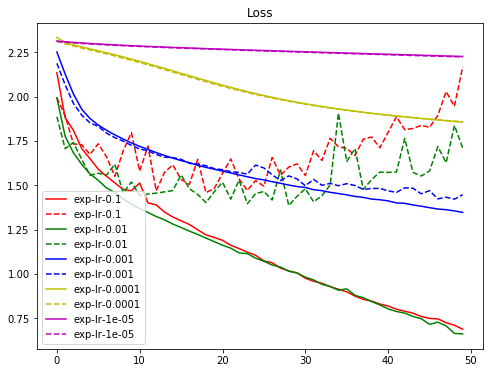

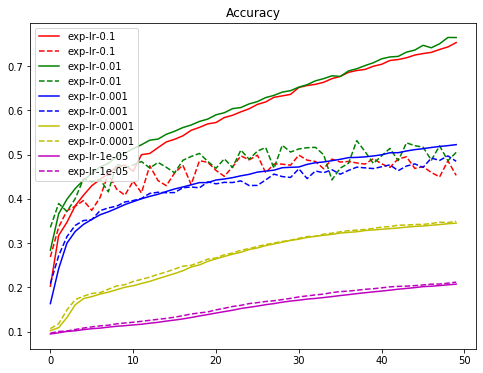

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()